# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('dataset/Google_Stock_Price_Train.csv')

In [3]:
dataset

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
dataset.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [6]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
training_set = dataset.iloc[:, 1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
training_set_scaled = scaler.fit_transform(training_set)

In [11]:
print(training_set_scaled)
print(training_set_scaled.shape)
print(len(training_set_scaled))

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]
(1258, 1)
1258


### Creating a data structure with 60 timestamps and 1 output

In [12]:
X_train = []
y_train = []
timesteps = 40

for i in range(timesteps, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-timesteps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train)
print(y_train)
print(X_train.shape)
print(y_train.shape)

[[0.08581368 0.09701243 0.09433366 ... 0.04286033 0.04602277 0.05398467]
 [0.09701243 0.09433366 0.09156187 ... 0.04602277 0.05398467 0.05738894]
 [0.09433366 0.09156187 0.07984225 ... 0.05398467 0.05738894 0.05714711]
 ...
 [0.96054394 0.9371419  0.92841729 ... 0.95475854 0.95204256 0.95163331]
 [0.9371419  0.92841729 0.90804747 ... 0.95204256 0.95163331 0.95725128]
 [0.92841729 0.90804747 0.8771858  ... 0.95163331 0.95725128 0.93796041]]
[0.05738894 0.05714711 0.05569611 ... 0.95725128 0.93796041 0.93688146]
(1218, 40)
(1218,)


### Reshaping

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(X_train)
print(X_train.shape)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.04286033]
  [0.04602277]
  [0.05398467]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.04602277]
  [0.05398467]
  [0.05738894]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.05398467]
  [0.05738894]
  [0.05714711]]

 ...

 [[0.96054394]
  [0.9371419 ]
  [0.92841729]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.9371419 ]
  [0.92841729]
  [0.90804747]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.92841729]
  [0.90804747]
  [0.8771858 ]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]
(1218, 40, 1)


# Building and Training the RNN

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [15]:
regressor = Sequential()

### LSTM layers

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(Dense(units = 1))

In [21]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 40, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 40, 100)           60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 40, 50)            30200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [23]:
regressor.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
20/20 [==============================] - 2s 95ms/step - loss: 0.0686
Epoch 2/200
20/20 [==============================] - 2s 91ms/step - loss: 0.0138
Epoch 3/200
20/20 [==============================] - 2s 91ms/step - loss: 0.0063
Epoch 4/200
20/20 [==============================] - 2s 91ms/step - loss: 0.0055
Epoch 5/200
20/20 [==============================] - 2s 91ms/step - loss: 0.0050
Epoch 6/200
20/20 [==============================] - 2s 89ms/step - loss: 0.0046
Epoch 7/200
20/20 [==============================] - 2s 90ms/step - loss: 0.0071
Epoch 8/200
20/20 [==============================] - 2s 90ms/step - loss: 0.0054
Epoch 9/200
20/20 [==============================] - 2s 89ms/step - loss: 0.0050
Epoch 10/200
20/20 [==============================] - 2s 89ms/step - loss: 0.0044
Epoch 11/200
20/20 [==============================] - 2s 90ms/step - loss: 0.0072
Epoch 12/200
20/20 [==============================] - 2s 88ms/step - loss: 0.0050
Epoch 13/200
20/20 [=====

20/20 [==============================] - 2s 90ms/step - loss: 0.0037
Epoch 102/200
20/20 [==============================] - 2s 91ms/step - loss: 0.0024
Epoch 103/200
20/20 [==============================] - 2s 91ms/step - loss: 0.0022
Epoch 104/200
20/20 [==============================] - 2s 91ms/step - loss: 0.0021
Epoch 105/200
20/20 [==============================] - 2s 90ms/step - loss: 0.0020
Epoch 106/200
20/20 [==============================] - 2s 89ms/step - loss: 0.0020
Epoch 107/200
20/20 [==============================] - 2s 91ms/step - loss: 0.0019
Epoch 108/200
20/20 [==============================] - 2s 92ms/step - loss: 0.0018
Epoch 109/200
20/20 [==============================] - 2s 89ms/step - loss: 0.0021
Epoch 110/200
20/20 [==============================] - 2s 91ms/step - loss: 0.0025
Epoch 111/200
20/20 [==============================] - 2s 91ms/step - loss: 0.0030
Epoch 112/200
20/20 [==============================] - 2s 91ms/step - loss: 0.0021
Epoch 113/200
20/2

20/20 [==============================] - 2s 91ms/step - loss: 0.0014
Epoch 200/200
20/20 [==============================] - 2s 92ms/step - loss: 0.0013


# Making the predictions and visualising the results

In [24]:
dataset_test = pd.read_csv('dataset/Google_Stock_Price_Test.csv')

dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [25]:
test_set = dataset_test.iloc[:, 1:2].values
print(test_set)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [26]:
dataset_total = pd.concat([dataset['Open'], dataset_test['Open']], axis = 0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [27]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values
inputs.shape

(60,)

In [28]:
inputs = inputs.reshape(-1, 1)
inputs.shape

(60, 1)

In [29]:
inputs = scaler.transform(inputs)
len(inputs)

60

In [30]:
X_test = []

for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)

In [31]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test

array([[[0.90804747],
        [0.8771858 ],
        [0.92153434],
        [0.93809063],
        [0.93165414],
        [0.95254483],
        [0.88812412],
        [0.88637547],
        [0.87032145],
        [0.88563137],
        [0.90743359],
        [0.91571173],
        [0.89941588],
        [0.91805566],
        [0.9089404 ],
        [0.9024853 ],
        [0.89456061],
        [0.91600938],
        [0.9132934 ],
        [0.88979835],
        [0.86589404],
        [0.89030062],
        [0.90335962],
        [0.89642086],
        [0.91777662],
        [0.93176576],
        [0.94114145],
        [0.95762334],
        [0.96413424],
        [0.96402262],
        [0.96971501],
        [0.95077759],
        [0.96294367],
        [0.96123223],
        [0.95475854],
        [0.95204256],
        [0.95163331],
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.8771858 ],
        [0.92153434],
        [0.93809063],
        [0.93165414],
        [0.95254483],
        

### Predicting

In [32]:
predicted = regressor.predict(X_test)
predicted = scaler.inverse_transform(predicted)

In [33]:
print(predicted)

[[777.1274 ]
 [774.1353 ]
 [775.32074]
 [777.3767 ]
 [781.23615]
 [787.87067]
 [793.3026 ]
 [794.6244 ]
 [794.4744 ]
 [794.477  ]
 [794.6937 ]
 [794.5952 ]
 [794.27386]
 [794.7227 ]
 [795.5828 ]
 [801.09827]
 [808.8781 ]
 [816.438  ]
 [819.33777]
 [812.64294]]


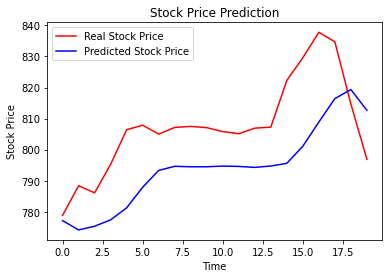

In [34]:
plt.plot(test_set, color = 'red', label = 'Real Stock Price')
plt.plot(predicted, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [35]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set, predicted))
print('rmse = ', rmse)

rmse =  17.051594321705533
